# Complementaria 3 — Teorema del Límite Central y validación empírica


En la complementaria anterior se estudió una variable aleatoria definida como el
máximo de dos dados mediante simulación de Monte Carlo, a partir de la cual se estimaron
empíricamente su función de probabilidad, su media y su varianza.

En este contexto, la simulación de Monte Carlo permite aproximar cantidades de interés,
pero dichas estimaciones están sujetas a variabilidad muestral. El Teorema del Límite
Central (TLC) constituye el fundamento teórico que permite describir el comportamiento
de la media muestral, aproximar su distribución y cuantificar la incertidumbre de las
estimaciones obtenidas por simulación.

A partir de este marco, surge la siguiente pregunta: ¿qué ocurre con la distribución de
la media muestral cuando el número de observaciones aumenta? El Teorema del Límite Central
responde a esta cuestión. A continuación, la parte D del ejercicio trabajado en la complementaria 2.

## 1. Parte D — Extensión: Teorema de límite central (TLC)

Tomaremos muchos promedios de $M=\max(D_1,D_2)$. Aunque $M$ no es Normal, el **promedio** de $k$ réplicas independientes se aproxima a Normal para $k$ suficientemente grande (generalmente se considera 30 un valor de $k$ suficientemente grande).

Definimos el promedio:
$$
\bar M_k \;=\; \frac{1}{k}\sum_{j=1}^{k} M_j
$$

Parámetros teóricos de $M$ con pmf $p(m)=\tfrac{2m-1}{36}$ para $m=1,\dots,6$:
$$
\mu \;=\; \sum_{m=1}^{6} m\,p(m),
\qquad
\mathbb{E}[M^2] \;=\; \sum_{m=1}^{6} m^2\,p(m),
\qquad
\sigma^2 \;=\; \mathbb{E}[M^2]-\mu^2.
$$

Para el promedio de $k$ observaciones i.i.d.:
$$
\mathbb{E}[\bar M_k] \;=\; \mu,
\qquad
\mathrm{Var}(\bar M_k) \;=\; \frac{\sigma^2}{k},
\qquad
\mathrm{SE}(\bar M_k) \;=\; \frac{\sigma}{\sqrt{k}}.
$$

Estandarización y forma límite (TLC):
$$
Z_k \;=\; \frac{\bar M_k - \mu}{\sigma/\sqrt{k}}
\;\;\approx\;\; \mathcal{N}(0,1)
\quad \text{cuando } k \text{ es grande.}
$$

Intervalo de confianza del 95 % para la media con $\sigma$ desconocida (sustituyendo $s$ por $\sigma$):
$$
\bar M_k \;\pm\; 1.96\,\frac{s}{\sqrt{k}}
\quad\text{(para } k \text{ grande; en muestras pequeñas usar } t_{0.975,\,k-1}\text{)}.
$$

Ideas prácticas:
- Aumentar $k$ reduce la variabilidad del promedio: el error estándar cae como $1/\sqrt{k}$.
- Para visualizar el TLC, grafica el histograma de $Z_k$ y un QQ-plot contra la Normal estándar; deberían verse cercanos a $\mathcal N(0,1)$.




In [1]:
# importar librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### 1.1 Simulación de la variable aleatoria base

En esta sección se utiliza simulación de Monte Carlo para generar realizaciones
independientes de la variable aleatoria \( M = \max(D_1, D_2) \), donde
\( D_1 \) y \( D_2 \) representan lanzamientos independientes de dos dados justos.
La semilla del generador se fija para garantizar reproducibilidad.


In [2]:

rng = np.random.default_rng(0)    # 0) generador con semilla (reproducible)
N = 200000                        # 1) número de simulaciones

# 2) creación de las muestras de los dos dados y cálculo del máximo
d1 = rng.integers(1, 7, size=N)   # enteros en [1,6]
d2 = rng.integers(1, 7, size=N)
M  = np.maximum(d1, d2)
m       = np.arange(1, 7)



### 1.2 Construcción de promedios muestrales

Para analizar empíricamente el comportamiento de la media muestral, se construyen
réplicas independientes. Cada réplica consiste en \( k \) observaciones de la variable
\( M \), a partir de las cuales se calcula un promedio.
El número total de réplicas se denota por `reps`.


In [3]:
k = 30          # tamaño del promedio (cuántos datos se promedian DENTRO de cada réplica)
reps = 20000    # número de réplicas (cuántos promedios se calculan)

# 1) creación de las muestras de los dos dados y cálculo del máximo
rolls1 = rng.integers(1, 7, size=(reps, k))  # enteros en [1,6]
rolls2 = rng.integers(1, 7, size=(reps, k))
# 2) se guardan en matrices de tamaño (reps, k)  -> cada fila = 1 réplica con k observaciones
Mmat   = np.maximum(rolls1, rolls2)
# 3) se calcula el promedio de cada fila (promedio dentro de cada réplica)
means  = Mmat.mean(axis=1)




### 1.3 Parámetros teóricos de la variable aleatoria

Con el fin de aplicar el Teorema del Límite Central, se calculan los parámetros
teóricos de la variable aleatoria \( M \), utilizando su función de probabilidad:

$$
\mathbb{P}(M = m) = \frac{2m - 1}{36}, \quad m = 1, \dots, 6.
$$


In [4]:
# 4) parámetros teóricos de M (pmf: (2m-1)/36)
mu   = (m * ((2*m - 1)/36)).sum()          # E[M]
Ex2  = ((m**2) * ((2*m - 1)/36)).sum()     # E[M^2]
sigma = np.sqrt(Ex2 - mu**2)               # SD(M)



### 1.4 Aplicación del Teorema del Límite Central

A continuación, se estandarizan los promedios muestrales utilizando la expresión
del Teorema del Límite Central:

$$
Z = \frac{\bar{M} - \mu}{\sigma / \sqrt{k}}.
$$

Bajo este resultado teórico, la variable \( Z \) debería aproximarse a una
distribución normal estándar cuando el tamaño de muestra \( k \) es suficientemente grande.


In [5]:
# 5) estandarización de los promedios: Z = (mean - mu) / (sigma / sqrt(k))
z = (means - mu) / (sigma/np.sqrt(k))

print("Media de z:", z.mean(), "  Desv. Estándar de z:", z.std(ddof=1))
# análisis: z ~ Normal(0,1) -> media ~ 0 y sd ~ 1



Media de z: 0.0136380696018807   Desv. Estándar de z: 0.9973735563051509


### 1.5 Intervalo de confianza para la esperanza de \( M \)

Finalmente, se construye un intervalo de confianza del 95% para la esperanza de
la variable aleatoria \( M \), dado por:

$$
\bar{M} \pm 1.96 \, \frac{s}{\sqrt{n}}.
$$



In [6]:
# IC 95% para E[M] usando el TLC y s como estimador de sigma
inferior = means.mean() - 1.96 * means.std(ddof=1) / np.sqrt(reps)
superior = means.mean() + 1.96 * means.std(ddof=1) / np.sqrt(reps)
print(f"IC 95% para E[M]: ({inferior:.4f}, {superior:.4f})")

IC 95% para E[M]: (4.4722, 4.4793)


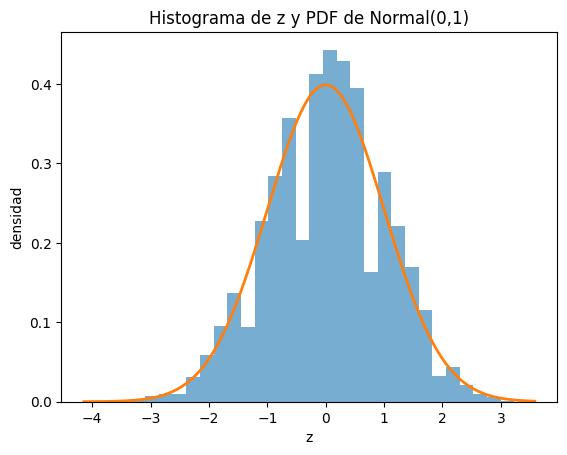

In [7]:
# visualización TCL con un histograma de los z
from scipy.stats import norm

plt.hist(z, bins=30, density=True, alpha=0.6)   # histograma de z
xmin, xmax = plt.xlim()                         # límites del eje x para trazar la pdf
x = np.linspace(xmin, xmax, 200)                # malla para la curva teórica
p = norm.pdf(x, 0, 1)                           # pdf de N(0,1)
plt.plot(x, p, linewidth=2)                     # curva teórica sobre el histograma
plt.title("Histograma de z y PDF de Normal(0,1)")
plt.xlabel("z")
plt.ylabel("densidad")
plt.show()

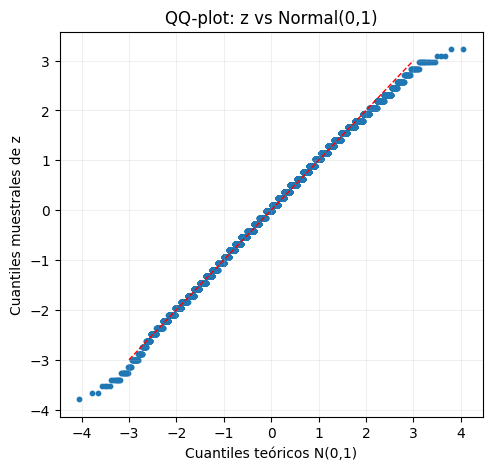

In [8]:
# 1) cuantiles teóricos de N(0,1) para probs (i - 0.5)/reps
norm_quantiles = norm.ppf((np.arange(1, reps + 1) - 0.5) / reps)

# 2) ordenar los z muestrales
sorted_z = np.sort(z)

# 3) gráfico QQ: puntos vs línea y = x
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(norm_quantiles, sorted_z, s=10)      # puntos QQ
plt.plot([-3, 3], [-3, 3], 'r--', linewidth=1)   # línea de referencia
plt.title("QQ-plot: z vs Normal(0,1)")
plt.xlabel("Cuantiles teóricos N(0,1)")
plt.ylabel("Cuantiles muestrales de z")
plt.grid(alpha=0.2)

## 2. Formalización del TLC


A partir de este momento se introduce formalmente el Teorema del Límite Central (TLC),
el cual describe el comportamiento asintótico de la media muestral. A través de
procedimientos de simulación y ejemplos con distintas distribuciones de probabilidad,
se validará empíricamente el TLC y se ilustrarán algunas de sus aplicaciones utilizando Simulación de Montecarlo.


### 2.1 TLC


El análisis estadístico de fenómenos aleatorios se basa en el estudio de variables
aleatorias y sus distribuciones de probabilidad. En muchos contextos prácticos,
las distribuciones originales no siguen una forma normal, lo que dificulta el
análisis directo.

El **Teorema del Límite Central (TLC)** constituye uno de los resultados fundamentales
de la probabilidad, ya que establece que, bajo condiciones generales, la distribución
de la media muestral converge a una distribución normal cuando el tamaño de la muestra
es suficientemente grande, independientemente de la distribución original.




Sea $\{X_1, X_2, \dots, X_n\}$ una sucesión de variables aleatorias independientes e
idénticamente distribuidas, con esperanza matemática $\mu$ y varianza finita $\sigma^2$.

La media muestral se define como:

$$
\bar{X} = \frac{1}{n}\sum_{i=1}^{n} X_i
$$

El Teorema del Límite Central establece que, cuando $n \to \infty$:

$$
\bar{X} \;\xrightarrow{d}\; \mathcal{N}\left(\mu,\frac{\sigma^2}{n}\right)
$$

Equivalentemente, la variable estandarizada:

$$
Z = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}}
$$

converge en distribución a una normal estándar:

$$
Z \;\xrightarrow{d}\; \mathcal{N}(0,1)
$$


### 2.2 Validación empírica del TLC mediante simulación
Para verificar empíricamente el Teorema del Límite Central utilizaremos simulación.
La idea consiste en:

1. Generar muchas muestras aleatorias de tamaño $n$ desde una distribución dada.
2. Calcular la media de cada muestra.
3. Analizar la distribución empírica de esas medias.

Este procedimiento ya es conocido y lo denotamos como **Simulación Monte Carlo**.


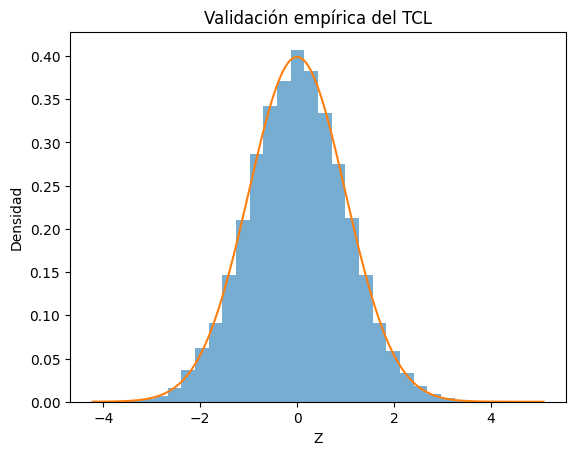

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)

# Parámetros
R = 20000
n = 40

# Simulación Monte Carlo
X = np.random.uniform(0, 1, size=(R, n))
X_barra = X.mean(axis=1)

# Parámetros teóricos de la distribución Uniforme U(0,1)
mu = 0.5
sigma = np.sqrt(1/12)

# Variable estandarizada (TCL)
Z = (X_barra - mu) / (sigma / np.sqrt(n))

# Histograma + Normal(0,1)
plt.hist(Z, bins=30, density=True, alpha=0.6)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
plt.plot(x, norm.pdf(x, 0, 1))

plt.title("Validación empírica del TCL")
plt.xlabel("Z")
plt.ylabel("Densidad")
plt.show()


### 2.3 Generación de Distribuciones y Validación empírica del TLC

#### 2.3.1 Distribución Uniforme


Sea $X \sim \mathcal{U}(0,1)$. Se tiene:

$$
\mu = \frac{1}{2}, \qquad \sigma^2 = \frac{1}{12}
$$

Se estudia la convergencia de la distribución de $\bar X$ para distintos valores de $n$.


In [11]:
np.random.seed(42)

# Parámetros teóricos Uniforme(0,1)
mu_u = 0.5
sigma_u = np.sqrt(1/12)

R = 20000  # repeticiones Monte Carlo


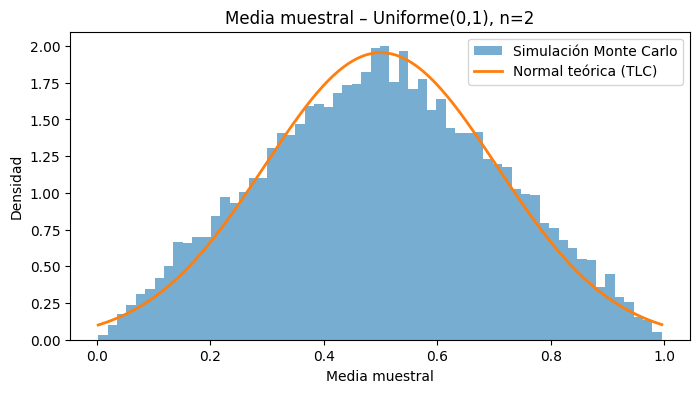

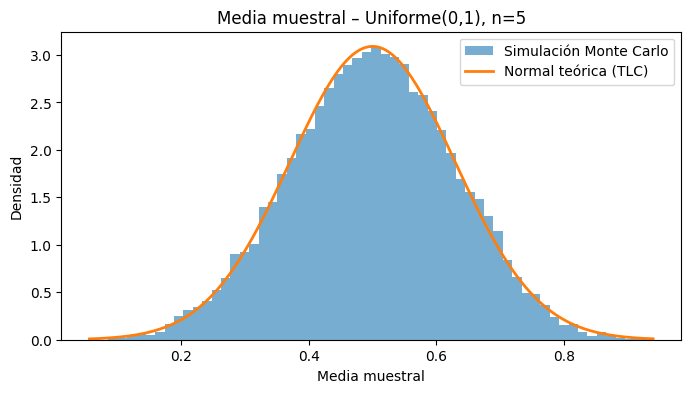

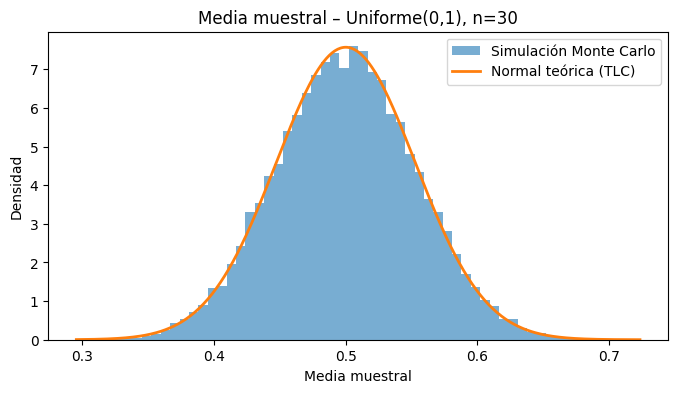

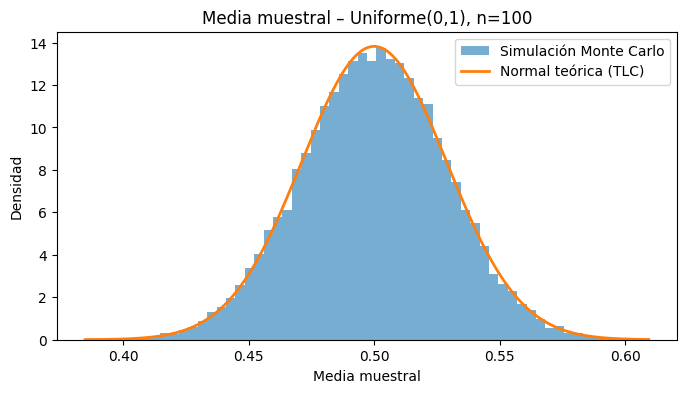

In [12]:
# Valores de n que vamos a analizar
for n in [2, 5, 30, 100]:

    # 1) Simulamos R medias muestrales (sin simulate_sample_means)
    X = np.random.uniform(0, 1, size=(R, n))   # R muestras de tamaño n
    means = X.mean(axis=1)                     # R medias muestrales

    # 2) Eje x para la normal teórica
    x = np.linspace(means.min(), means.max(), 400)

    plt.figure(figsize=(8,4))

    # Histograma de medias simuladas
    plt.hist(means, bins=60, density=True, alpha=0.6, label="Simulación Monte Carlo")

    # 3) Curva normal teórica 
    
    plt.plot(x, norm.pdf(x, loc=mu_u, scale=sigma_u/np.sqrt(n)),
             linewidth=2, label="Normal teórica (TLC)")

    plt.title(f"Media muestral – Uniforme(0,1), n={n}")
    plt.xlabel("Media muestral")
    plt.ylabel("Densidad")
    plt.legend()
    plt.show()

#### 2.3.2 Distribución Exponencial

Sea una variable aleatoria:

$$
X \sim \mathrm{Exp}(\lambda)
$$

La distribución exponencial se caracteriza por una marcada asimetría a la derecha.
Sus momentos principales son:

$$
\mathbb{E}[X] = \frac{1}{\lambda}, \qquad
\mathrm{Var}(X) = \frac{1}{\lambda^2}
$$

A pesar de no ser una distribución normal, la exponencial cumple las hipótesis del
Teorema del Límite Central, ya que posee esperanza y varianza finitas.

Sea una muestra independiente e idénticamente distribuida
$\{X_1, X_2, \dots, X_n\}$, con:

$$
\bar{X} = \frac{1}{n}\sum_{i=1}^{n} X_i
$$

Entonces, cuando $n$ es suficientemente grande:

$$
\bar{X}
\;\xrightarrow{d}\;
\mathcal{N}\left(
\frac{1}{\lambda},
\frac{1}{n\lambda^2}
\right)
$$

A continuación se valida empíricamente este resultado mediante simulación Monte Carlo.


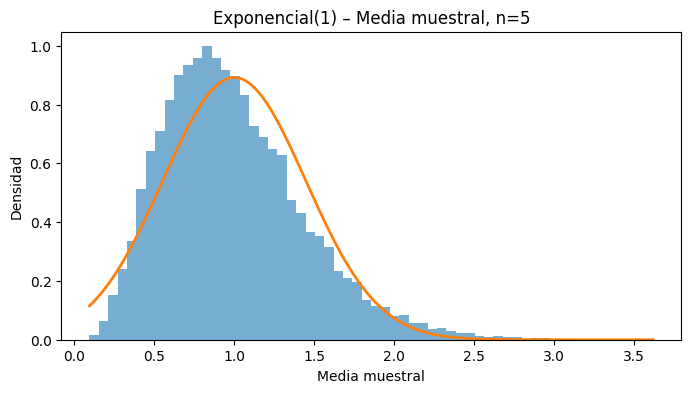

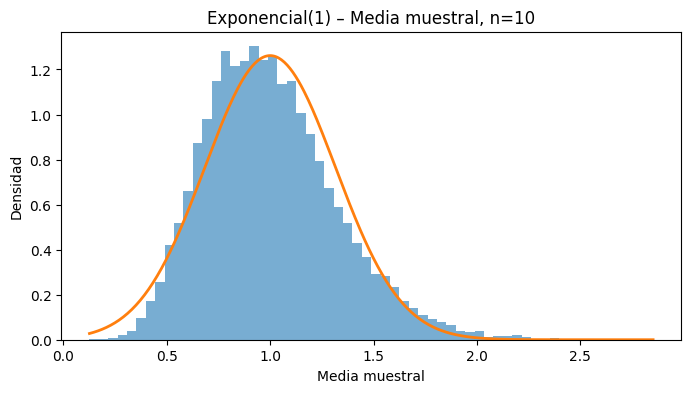

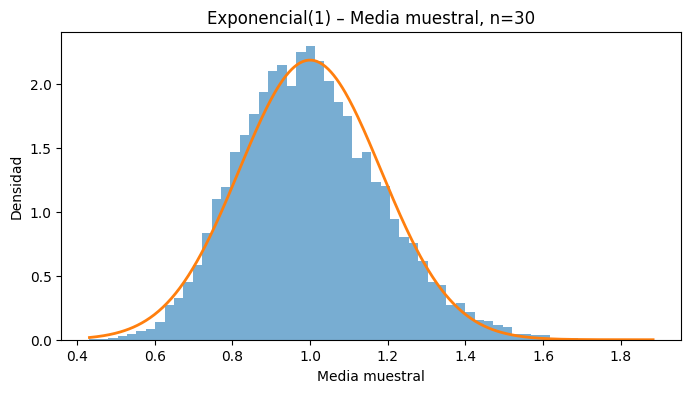

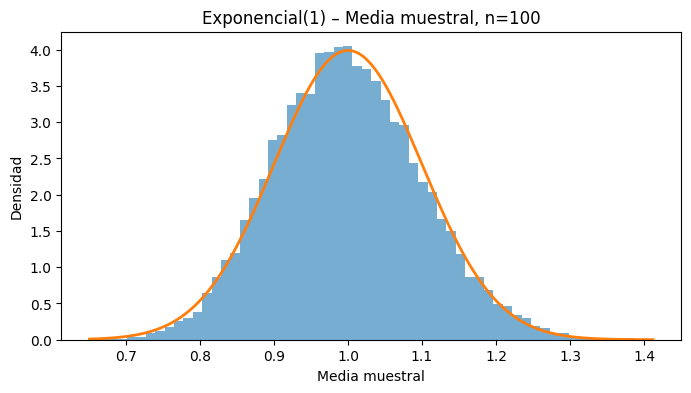

In [19]:
np.random.seed(42)

# Parámetros teóricos Exponencial(1)
mu_e = 1
sigma_e = 1

R = 20000  # repeticiones Monte Carlo

for n in [5, 10,30, 100]:

    # 1) Simulación directa de R muestras de tamaño n
    X = np.random.exponential(scale=1.0, size=(R, n))

    # 2) Medias muestrales
    means = X.mean(axis=1)

    # 3) Eje x para la normal teórica
    x = np.linspace(means.min(), means.max(), 400)

    plt.figure(figsize=(8,4))

    # Histograma de medias simuladas
    plt.hist(means, bins=60, density=True, alpha=0.6)

    # 4) Normal teórica según el TLC
    plt.plot(
        x,
        norm.pdf(x, loc=mu_e, scale=sigma_e/np.sqrt(n)),
        linewidth=2
    )

    plt.title(f"Exponencial(1) – Media muestral, n={n}")
    plt.xlabel("Media muestral")
    plt.ylabel("Densidad")
    plt.show()

<div style="background-color:#fff4e5; border-left:4px solid #f5a623; padding:10px; margin:10px 0;">

**Observación importante**

Si bien el Teorema del Límite Central garantiza la convergencia de la distribución
de la media muestral hacia una normal, es importante notar que no existe un tamaño
de muestra n “mágico” a partir del cual esta aproximación sea exacta.  
La **velocidad de convergencia** depende de la distribución original de la variable
aleatoria, en particular de su asimetría y dispersión. Este comportamiento se observa
de manera implícita en los resultados obtenidos, donde tamaños de muestra moderados
ya permiten una aproximación razonable.

</div>



Para verificar el TLC de forma más formal, se estandariza la media muestral:

$$
Z = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}}
$$

Si el TLC se cumple, entonces $Z$ debe aproximarse a una distribución
normal estándar $\mathcal{N}(0,1)$.


Para verificar esto, realizamos el siguiente procedimiento

In [14]:
np.random.seed(42)

# Tamaño de muestra
n = 50

# Parámetros teóricos Exponencial(1)
mu_e = 1
sigma_e = 1

R = 30000  # repeticiones Monte Carlo

# 1) Generar las muestras
X = np.random.exponential(scale=1.0, size=(R, n))

# 2) Medias muestrales
means = X.mean(axis=1)

# 3) Estandarización (TLC)
Z = (means - mu_e) / (sigma_e / np.sqrt(n))


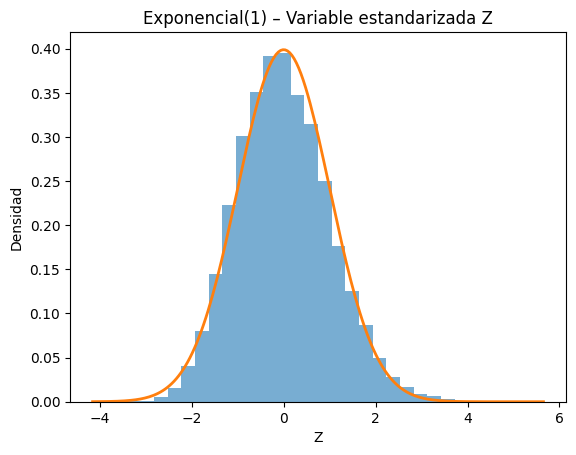

In [15]:
#Visualización
plt.hist(Z, bins=30, density=True, alpha=0.6)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
plt.plot(x, norm.pdf(x, 0, 1), linewidth=2)

plt.title("Exponencial(1) – Variable estandarizada Z")
plt.xlabel("Z")
plt.ylabel("Densidad")
plt.show()

### 2.4 Extensión del Teorema del Límite Central mediante Simulación Monte Carlo

En muchos problemas aplicados, la variable de interés no corresponde a una
distribución de probabilidad elemental, sino al resultado de un sistema compuesto
por varias variables aleatorias. En estos casos, la distribución analítica de la
variable final suele ser desconocida o intratable.

Sea la ganancia diaria $G$ definida como:

$$
G = (P - C)\cdot D
$$

donde:
- $D \sim \mathrm{Poisson}(\lambda)$ representa la demanda diaria,
- $C \sim \mathrm{Lognormal}(\mu_L,\sigma_L)$ representa el costo unitario,
- $P$ es un precio unitario fijo.

La variable $G$ es una combinación no lineal de variables aleatorias discretas y
continuas, por lo que su distribución no tiene una forma cerrada sencilla.

El objetivo no es estudiar la distribución de $G$, sino **estimar su valor esperado**
$\mathbb{E}[G]$ y cuantificar la incertidumbre asociada a dicha estimación.
.


Para estimar $\mathbb{E}[G]$, se utiliza Simulación Monte Carlo. Se generan
$R$ realizaciones independientes de la variable $G$:

$$
G_1, G_2, \dots, G_R
$$

y se calcula su promedio muestral:

$$
\bar{G} = \frac{1}{R}\sum_{i=1}^{R} G_i
$$

Este promedio constituye un estimador natural del valor esperado
$\mathbb{E}[G]$.


In [17]:
# Parámetros del sistema
lam = 20
P = 15.0
mu_L = 2.2
sigma_L = 0.25
R = 50000

D = np.random.poisson(lam=lam, size=R)
C = np.random.lognormal(mean=mu_L, sigma=sigma_L, size=R)

G=(P - C) * D


G 


array([ 31.40088776,  69.13331447, 155.62430975, ..., 217.67666005,
        89.19093221,  51.90905148], shape=(50000,))

Las variables aleatorias $G_1, \dots, G_R$ son independientes e idénticamente
distribuidas y poseen varianza finita. Por lo tanto, el Teorema del Límite Central
es aplicable al promedio muestral $\bar{G}$.

Cuando $R$ es suficientemente grande, se tiene:

$$
\bar{G}
\;\xrightarrow{d}\;
\mathcal{N}\left(
\mathbb{E}[G],
\frac{\mathrm{Var}(G)}{R}
\right)
$$

Este resultado permite aproximar la distribución de $\bar{G}$ mediante una normal
y realizar inferencia estadística sobre $\mathbb{E}[G]$.


En la práctica, $\mathrm{Var}(G)$ es desconocida y se reemplaza por la varianza
muestral $s_G^2$. El error estándar del estimador $\bar{G}$ se define como:

$$
\mathrm{SE} = \frac{s_G}{\sqrt{R}}
$$

Un intervalo de confianza del $95\%$ para $\mathbb{E}[G]$ está dado por:

$$
\bar{G} \pm 1.96 \cdot \mathrm{SE}
$$


In [ ]:
# Estadísticos muestrales
mean_G = G.mean()
std_G = G.std(ddof=1)

# Error estándar según el TLC
se = std_G / np.sqrt(R)

# Intervalo de confianza del 95%
ci_low = mean_G - 1.96 * se
ci_high = mean_G + 1.96 * se

print("Estimación Monte Carlo de E[G]:", mean_G)
print("Intervalo de confianza 95%:", (ci_low, ci_high))


Estimación Monte Carlo de E[G]: 113.98989201273015
Intervalo de confianza 95%: (np.float64(113.50774623099105), np.float64(114.47203779446926))


Aunque la variable $G$ no sigue una distribución normal y su forma es desconocida,
el Teorema del Límite Central garantiza que el promedio de las simulaciones Monte
Carlo se aproxima a una distribución normal cuando el número de simulaciones es
suficientemente grande.

En consecuencia, el TLC permite realizar inferencia estadística sobre el valor
esperado de variables aleatorias complejas mediante Simulación Monte Carlo, incluso
en ausencia de una expresión analítica para su distribución.
